In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [15]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
model = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(10, 30)
}
cv = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42)
cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1690b34d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17294a250>},
                   random_state=42)

In [16]:
def cv_results(estimator, result='df'):
    """
    Return dataframe with cross validation results
    :param estimator: CV estimator
    :param result: option to return dataframe or plot
    :return: dataframe with cross validation results
    """
    results = pd.DataFrame(estimator.cv_results_)
    parameter_names = list(results['params'][0].keys())
    parameter_names = ['param_' + param for param in parameter_names]
    parameter_names.append('mean_test_score')
    parameter_names.append('std_test_score')
    parameter_names.append('params')
    results.sort_values(by='mean_test_score', ascending=False, inplace=True)
    results.reset_index(drop=True, inplace=True)

    if result == 'df':
        return results[parameter_names]

    if result == 'plot':
        results['mean_test_score'].plot(
            yerr=[results['std_test_score'],
                  results['std_test_score']],
            subplots=True)
        plt.ylabel('Mean test score')
        plt.xlabel('Hyperparameter combinations')
        plt.grid(True)
        plt.show();

In [17]:
cv_results(cv, result='df')

,param_max_depth,param_n_estimators,mean_test_score,std_test_score,params
0,16,142,0.919,0.016553,"{'max_depth': 16, 'n_estimators': 142}"
1,20,137,0.919,0.013565,"{'max_depth': 20, 'n_estimators': 137}"
2,21,138,0.919,0.016553,"{'max_depth': 21, 'n_estimators': 138}"
3,24,156,0.918,0.010296,"{'max_depth': 24, 'n_estimators': 156}"
4,16,171,0.917,0.013266,"{'max_depth': 16, 'n_estimators': 171}"
5,28,124,0.917,0.013266,"{'max_depth': 28, 'n_estimators': 124}"
6,26,108,0.916,0.014967,"{'max_depth': 26, 'n_estimators': 108}"
7,29,113,0.916,0.015297,"{'max_depth': 29, 'n_estimators': 113}"
8,24,100,0.916,0.016553,"{'max_depth': 24, 'n_estimators': 100}"
9,10,107,0.916,0.018547,"{'max_depth': 10, 'n_estimators': 107}"


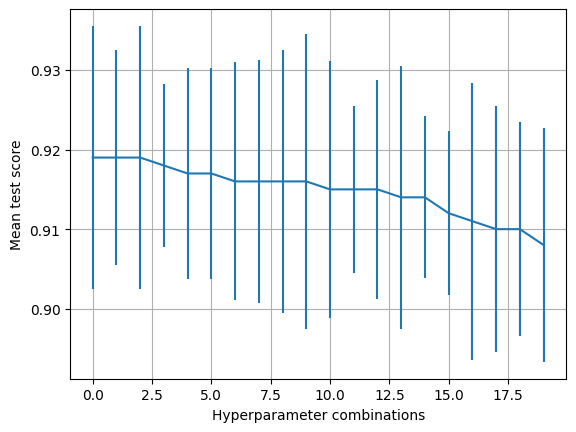

In [18]:
cv_results(cv, result='plot')